In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_excel('superstore.xls')

In [22]:
df['Segment'].value_counts(),df['Region'].value_counts(),df['Category'].value_counts()

(Consumer       5191
 Corporate      3020
 Home Office    1783
 Name: Segment, dtype: int64,
 West       3203
 East       2848
 Central    2323
 South      1620
 Name: Region, dtype: int64,
 Office Supplies    6026
 Furniture          2121
 Technology         1847
 Name: Category, dtype: int64)

In [19]:
df['Segment'] = df['Segment'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')

In [110]:
sales_df = df[['Segment','Sales','Region','Category']]

sum_by_region = df[['Region','Sales']].groupby('Region').sum()
sum_by_region = sum_by_region.reset_index()
sum_region = sum_by_region.iloc[:,1:]
label_region = sum_by_region.iloc[:,:1]

x = np.arange(len(label_region)) # Encontrar el tamaño de las etiquetas
labels = np.array(label_region) # Etiquetas
width = 0.35 # ancho de la barra 

In [111]:
# Suma individual de ventas por segmento por Region
sum_by_seg_reg = df[['Region','Segment','Sales']].groupby(['Region','Segment']).sum()
sum_by_seg_reg = sum_by_seg_reg.reset_index()

reg_temp_1 = sum_by_seg_reg[sum_by_seg_reg['Segment'].isin(['Consumer'])]
reg_temp_2 = sum_by_seg_reg[sum_by_seg_reg['Segment'].isin(['Corporate'])]
reg_temp_3 = sum_by_seg_reg[sum_by_seg_reg['Segment'].isin(['Home Office'])]


reg1 = np.array(reg_temp_1['Sales'])
reg2 = np.array(reg_temp_2['Sales'])
reg3 = np.array(reg_temp_3['Sales'])

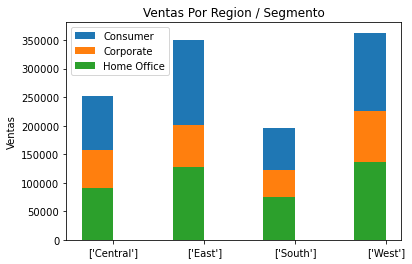

In [114]:
fig,ax = plt.subplots()

rects1 = ax.bar(x - width/2, reg1, width, label='Consumer')
rects2 = ax.bar(x - width/2, reg2, width, label='Corporate')
rects3 = ax.bar(x - width/2, reg3, width, label='Home Office')


ax.set_ylabel('Ventas')
ax.set_title('Ventas Por Region / Segmento')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()